# Deep Learning from Scratch

In this piece of code, I give an example of how to load data and create the first model. <br>
During PyData, we will try to replicate this entire model using only the NumPy library. <br>
This will help you understand what the neural network is and how it works.<br>
See you in PyData! <br>

In [1]:
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [48]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(30, activation=sigmoid)])

model.compile(optimizer='adagrad',                      # 'sgd' for momentum
              loss='sparse_categorical_crossentropy',   # 'mean_squared_error'
              metrics=['accuracy'])

In [49]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 40us/step - loss: 2.7819 - acc: 0.4010
Epoch 2/10
60000/60000 [==============================] - 2s 38us/step - loss: 2.3922 - acc: 0.4862
Epoch 3/10
60000/60000 [==============================] - 2s 40us/step - loss: 2.2955 - acc: 0.5034
Epoch 4/10
60000/60000 [==============================] - 2s 39us/step - loss: 2.2535 - acc: 0.5142
Epoch 5/10
60000/60000 [==============================] - 2s 38us/step - loss: 2.2109 - acc: 0.5217
Epoch 6/10
60000/60000 [==============================] - 2s 38us/step - loss: 2.1831 - acc: 0.5267
Epoch 7/10
60000/60000 [==============================] - 2s 38us/step - loss: 2.1658 - acc: 0.5289
Epoch 8/10
60000/60000 [==============================] - 3s 43us/step - loss: 2.1510 - acc: 0.5292
Epoch 9/10
60000/60000 [==============================] - 2s 38us/step - loss: 2.1389 - acc: 0.5306
Epoch 10/10
60000/60000 [==============================] - 2s 37us/step - loss: 2.1340 - acc: 0.5318

In [50]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.131118698120117
Test accuracy: 0.5384


we can see that the model is not ideal. <br> 
The errors are quite high, every time we repeat the model, errors are different. <br>
But even here we can ask a lot of questions. <br>
* What is Dense? 
* What does sigmoid do? 
* What is this Optimizer? 
* What the hell is loss functions? <br> <br>
During this PyData meeting, we will be able to find out what is what and how neural network is working.

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Formal Neuron
Formal neuron model was proposed by Warren McCulloch and Walter Pitts in 1943. <br>
A formal neuron is a simplified mathematical function obtained from a simplification of a biological neuron. <br>
<img src="images/formal_neuron.png" width="400"/>

In [9]:
def formal_neuron(x,w,h):
    '''
    x - inputs
    w - weights
    h - threshold
    '''
    a = np.matmul(w,x) # matmul - matrix multiplication
    a = a - h
    y = a>0
    return y.astype(int) # True = 1, False = 0

# Example nr. 1 - single neuron
<img src="images/1.png" width="250"/>

In [10]:
x = np.array([1, 1, 0])
w = np.array([0.5, 1.0, 0.5])
h = 1
print(formal_neuron(x,w,h))

1


<img src="images/2.png" width="550"/>

# Example nr. 2 - Multiple inputs
one neuron can process several input values. <br>

For example, we can provide an 8x3 matrix for the same neural network rather than 1x3. <br>
As a result, the output length will be not 1, but 8.<br>


In [11]:
x = np.array([[0,0,0,0,1,1,1,1],
              [0,0,1,1,0,0,1,1],
              [0,1,0,1,0,1,0,1]])

w = np.array([0.5, 1.0, 0.5])
h = 1

print(formal_neuron(x,w,h))

[0 0 0 1 0 0 1 1]


<img src="images/4.png" width="500"/>

# Example nr. 3 - Multiple Neurons
We can also increase the amount of neurons! <br>
<img src="images/5.png" width="500"/> <br>

#### what will be the answer and the shape of answer?


In [12]:
x = np.array([[0,0,0,0,1,1,1,1],
              [0,0,1,1,0,0,1,1],
              [0,1,0,1,0,1,0,1]])

w = np.array([[0.5, 1.0, 0.5],
              [0.,  0.5, 1.0]])

h = np.array([0.5, 1.]).reshape([-1,1])   
# Alternative
# h = np.array([[0.5], [1.]])

print(formal_neuron(x,w,h))

[[0 0 1 1 0 1 1 1]
 [0 0 0 1 0 0 0 1]]


# Example nr. 4 - Multiple Layer Neural Network (Perceptron)
we can also add an additional layer. Also known as a hidden layer.<br>
<img src="images/6.png" width="500"/> <br>

In [17]:
np.array([[0.5], [1.], [0.0]])

array([[0.5],
       [1. ],
       [0. ]])

In [18]:
x = np.array([[0,0,0,0,1,1,1,1],
              [0,0,1,1,0,0,1,1],
              [0,1,0,1,0,1,0,1]])

w = np.array([[0.5, 1.0, 0.5],
              [0.0, 0.5, 1.0],
              [1.0, 0.5, 0.0]])

h = np.array([0.5, 1., 0.0]).reshape([-1,1])

u = np.array([[1.0, 0.5, 0.0],
              [0.5, 0.0, 1.0]])

g = np.array([1., 0.]).reshape([-1,1])

y = formal_neuron(x,w,h)
z = formal_neuron(y,u,g)
print(y, '\n')
print(z)

[[0 0 1 1 0 1 1 1]
 [0 0 0 1 0 0 0 1]
 [0 0 1 1 1 1 1 1]] 

[[0 0 0 1 0 0 0 1]
 [0 0 1 1 1 1 1 1]]


# Variety of Activation Functions (Sigmoid)

<img src="images/7.png" width="700"/> <br>

In [19]:
def sigmoid_neuron(x,w,b):
    a = np.matmul(w,x)
    a = np.atleast_2d(a)
    b = np.atleast_2d(b)
    a = a + b
    y = 1. / (1 + np.exp(-a))
    return y

def formal_neuron2(x,w,b):
    p = np.matmul(w,x)
    p = np.atleast_2d(p)
    p = p + b
    y = p>0
    return y.astype(int)


# Example nr. 5 - Comparison of Activation Functions
Now compare the two answers, use the same data, only the different activation functions.<br> What is the difference between these activation functions?

In [20]:
print(z, '\n')

y = sigmoid_neuron(x,w,h)
z = sigmoid_neuron(y,u,g)

print(np.round(z,2))

[[0 0 0 1 0 0 0 1]
 [0 0 1 1 1 1 1 1]] 

[[0.88 0.9  0.9  0.91 0.89 0.91 0.91 0.92]
 [0.69 0.7  0.74 0.74 0.75 0.76 0.78 0.78]]


# Example nr. 6 - A more representative example
a two-dimensional graph more representative will show that sigmoid shows likelihood, <br> 
while a formal neuron simply assigns a more likely category.

In [21]:
x = np.array([[0,0,1,1],
              [0,1,0,1]])

w = np.array([[ 2.,  2.],
              [-2., -2.]])

b = np.array([-1, 3.]).reshape([-1,1])

u = np.array([ 2.,  2.])
c = -3.

dim = np.arange(0., 1. , 0.01)
X, Y = np.meshgrid(dim, dim)
xg = np.array([X.ravel(), Y.ravel()])

In [22]:
ys = sigmoid_neuron(xg, w, b)
zs = sigmoid_neuron(ys, u, c)

yf = formal_neuron2(xg, w, b)
zf = formal_neuron2(yf, u, c)

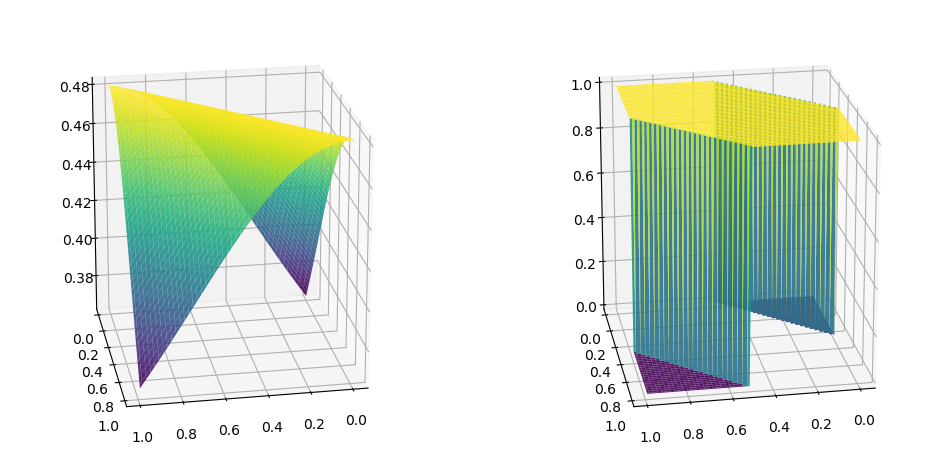

In [23]:
fig = plt.figure( figsize = (12,6), dpi = 100)

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, 
                Y, 
                zs.reshape(100,100), 
                cmap = 'viridis', 
                alpha = 0.9)
ax.view_init(20, 80)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, 
                Y, 
                zf.reshape(100,100), 
                cmap = 'viridis', 
                alpha = 0.9)
ax.view_init(20, 80)

plt.show()

# Backpropagation and Loss function

A loss function (a.k.a. cost function) is a function that calculates how different between an output  and a training value. <br>
One of the most useful cost function is MSE (Mean Squared Error) as follows. <br>
<img src="images/8.png" width="200"/> 
<br> where 𝑛 is a dimension of output (a number of neurons in the output layer). <br>



In [24]:
def loss_function(y1,y2):
    col = np.atleast_2d(y1).shape[1]
    loss = np.sum(np.power((y1-y2),2)) / col
    return loss

In [25]:
loss_function(zs,zf)

0.2539418858291893

# Example nr. 7 - Backpropagation
<img src="images/9.png" width="500"/> 

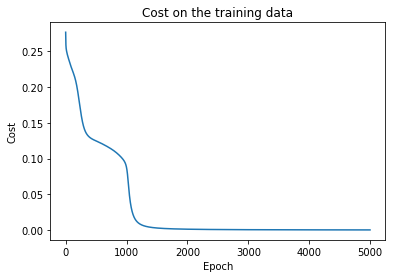

In [26]:
xdata = np.array([[0,0,0,0,1,1,1,1],
                  [0,0,1,1,0,0,1,1],
                  [0,1,0,1,0,1,0,1]])
     
labels = np.array([0,1,1,0,1,0,0,0])
EPOCH=5000  # a number of trainig epochs
LAMBDA=0.5  # learning rate

loss = np.zeros(EPOCH) # for saving loss at each epoch
o=np.zeros(labels.shape)

inputs = 3;     # a number of input neurons
hidden = 3;     # a number of hidden neurons
output = 1;     # a number of output neurons
 
# initialize weights and biases
# as random numbers between -1.0 and 1.0.
w =  2.0*np.random.rand(hidden,inputs) - 1.0
b = (2.0*np.random.rand(hidden,1) - 1.0).reshape(-1,1)
u =  2.0*np.random.rand(output,hidden) - 1.0
c = (2.0*np.random.rand(output,1) - 1.0)

for epoch in range(EPOCH):
    for n in range(xdata.shape[1]):
        x = np.take(xdata,[n],1)
        y = sigmoid_neuron(x,w,b)
        z = sigmoid_neuron(y,u,c)
        t = labels[n]
        o[n]=z
        
        delta_out = ((z-t)*(z*(1-z)))
        delta_hidden = np.matmul(delta_out.T,u).T * (y*(1-y))
        u=u - LAMBDA * delta_out * y.T
        c=c - LAMBDA * delta_out
        w=w - LAMBDA * delta_hidden * x.T
        b=b - LAMBDA * delta_hidden
        
    # calculate current LOSS
    loss[epoch] = loss_function(o, labels)


plt.plot(np.arange(0,EPOCH), loss)
plt.title('Cost on the training data')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

# Example nr. 8 - MNIST
<img src="images/MNIST.png" width="500"/> 

In [27]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [39]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [29]:
train_num = x_train.shape[0] # Number of Training samples (MNIST has 60,000 Training samples)
train_label_vecs = np.zeros(shape=(10,train_num))
for j in range(train_num):
    i = y_train[j]
    train_label_vecs[i,j] = 1 
    

test_num = x_test.shape[0]
test_label_vecs = np.zeros(shape=(10,test_num))
for j in range(test_num):
    i = y_test[j]
    test_label_vecs[i,j] = 1 

In [31]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [32]:
train_label_vecs[:,:5]

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [33]:
inputs = 784 # a number of input neurons (28*28 = 784)
hidden = 30  # a number of hidden neurons
output = 10  # a number of output neurons (Prediction can be from 0 to 9)

w =  2.0*np.random.rand(hidden,inputs) - 1.0
b = (2.0*np.random.rand(hidden,1) - 1.0).reshape(-1,1)
u =  2.0*np.random.rand(output,hidden) - 1.0
c = (2.0*np.random.rand(output,1) - 1.0) #.reshape(-1,1)

EPOCH=10    # a number of training epochs
LAMBDA=0.01 # learning rate

o = np.zeros(shape=(10,train_num))
loss = np.zeros(EPOCH) # for saving loss at each epoch

for epoch in range(EPOCH):
    for n in range(train_num):
        x = x_train[n,:,:].reshape(-1,1)
        y = sigmoid_neuron(x,w,b)
        z = sigmoid_neuron(y,u,c)
        t = train_label_vecs[:,n].reshape(-1,1)
        
        o[:,n] = z.ravel()
        
        delta_out = ((z-t)*(z*(1-z)))
        delta_hidden = np.matmul(delta_out.T,u).T * (y*(1-y))
        
        u=u - LAMBDA * delta_out * y.T
        c=c - LAMBDA * delta_out
        w=w - LAMBDA * delta_hidden * x.T
        b=b - LAMBDA * delta_hidden
        
    loss[epoch] = loss_function(o, train_label_vecs)    

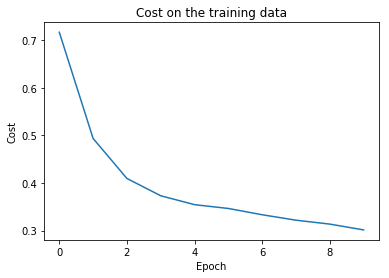

In [34]:
plt.plot(np.arange(0,EPOCH), loss)
plt.title('Cost on the training data')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

In [35]:
# Calculate TRAIN accuracy
train_res_mat = np.zeros((10, 10))
for n in range(train_num):
    x = x_train[n,:,:].reshape(-1,1)
    y = sigmoid_neuron(x,w,b)
    z = sigmoid_neuron(y,u,c)
    pred = np.argmax(z)
    true = y_train[n]
    
    train_res_mat[pred,true] = train_res_mat[pred,true] + 1

train_accuracy = np.trace(train_res_mat)/ np.sum(np.sum(train_res_mat))
print(train_accuracy)

0.8235333333333333


In [37]:
train_res_mat.astype(int)

array([[5466,    7,  115,   66,   27,  159,   93,   89,   28,   85],
       [   1, 6415,  176,   93,   61,  110,   37,  124,  114,   79],
       [  49,   48, 4497,  339,   60,   72,  162,  186,  124,   61],
       [  53,   43,  256, 4631,   23,  330,    7,   39,  325,  123],
       [  12,   14,  125,   22, 4889,  113,   50,  131,   80,  430],
       [ 207,   33,   38,  483,   29, 4034,  190,   69,  429,   97],
       [  64,    9,  240,   72,  223,  126, 5316,   26,  136,   60],
       [  25,   45,  219,  118,   15,   97,    5, 5159,   37,  271],
       [  32,  110,  270,  233,   74,  234,   38,   80, 4410,  148],
       [  14,   18,   22,   74,  441,  146,   20,  362,  168, 4595]])

In [38]:
# Calculate TEST accuracy
test_res_mat = np.zeros((10, 10))
for n in range(test_num):
    x = x_test[n,:,:].reshape(-1,1)
    y = sigmoid_neuron(x,w,b)
    z = sigmoid_neuron(y,u,c)
    pred = np.argmax(z)
    true = y_test[n]
    
    test_res_mat[pred,true] = test_res_mat[pred,true] + 1

test_accuracy = np.trace(test_res_mat)/ np.sum(np.sum(test_res_mat))
print(test_accuracy)

0.8252


# Example nr. 9 - Optimizers - Momentum
<img src="images/Momentum.png" width="400"/>

In [40]:
inputs = 784 # a number of input neurons (28*28 = 784)
hidden = 30  # a number of hidden neurons
output = 10  # a number of output neurons (Prediction can be from 0 to 9)

w =  2.0*np.random.rand(hidden,inputs) - 1.0
b = (2.0*np.random.rand(hidden,1) - 1.0).reshape(-1,1)
u =  2.0*np.random.rand(output,hidden) - 1.0
c = (2.0*np.random.rand(output,1) - 1.0) #.reshape(-1,1)
dw = w
db = b
du = u
dc = c

ETA = 0.5

EPOCH=10    # a number of training epochs
LAMBDA=0.01 # learning rate

o = np.zeros(shape=(10,train_num))
loss = np.zeros(EPOCH) # for saving loss at each epoch

for epoch in range(EPOCH):
    for n in range(train_num):
        x = x_train[n,:,:].reshape(-1,1)
        y = sigmoid_neuron(x,w,b)
        z = sigmoid_neuron(y,u,c)
        t = train_label_vecs[:,n].reshape(-1,1)
        
        o[:,n] = z.ravel()
        
        delta_out = ((z-t)*(z*(1-z)))
        delta_hidden = np.matmul(delta_out.T,u).T * (y*(1-y))
        
        du = ETA * du - LAMBDA * delta_out * y.T
        dc = ETA * dc - LAMBDA * delta_out
        dw = ETA * dw - LAMBDA * delta_hidden * x.T
        db = ETA * db - LAMBDA * delta_hidden
        
        u = u + du
        c = c + dc
        w = w + dw
        b = b + db
        
    loss[epoch] = loss_function(o, train_label_vecs)    

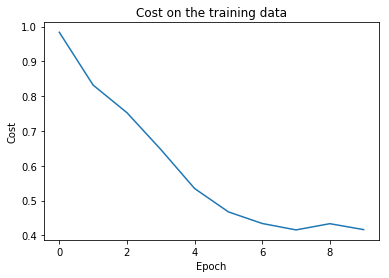

In [41]:
plt.plot(np.arange(0,EPOCH), loss)
plt.title('Cost on the training data')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

In [42]:
# Calculate TRAIN accuracy
train_res_mat = np.zeros((10, 10))
for n in range(train_num):
    x = x_train[n,:,:].reshape(-1,1)
    y = sigmoid_neuron(x,w,b)
    z = sigmoid_neuron(y,u,c)
    pred = np.argmax(z)
    true = y_train[n]
    
    train_res_mat[pred,true] = train_res_mat[pred,true] + 1

train_accuracy = np.trace(train_res_mat)/ np.sum(np.sum(train_res_mat))
print(train_accuracy)

0.7351166666666666


In [43]:
# Calculate TEST accuracy
test_res_mat = np.zeros((10, 10))
for n in range(test_num):
    x = x_test[n,:,:].reshape(-1,1)
    y = sigmoid_neuron(x,w,b)
    z = sigmoid_neuron(y,u,c)
    pred = np.argmax(z)
    true = y_test[n]
    
    test_res_mat[pred,true] = test_res_mat[pred,true] + 1

test_accuracy = np.trace(test_res_mat)/ np.sum(np.sum(test_res_mat))
print(test_accuracy)

0.7412


# Example nr. 9 - Optimizers - AdaGrad
##### Learning Late decay
If the learning rate 𝜆 is gradually decreased, an optimal weights can be efficiently obtained. <br>
<img src="images/10.png" width="400"/> 

##### AdaGrad
AdaGrad is an improved method of Learning rate decay. <br>
Adjust the decay rate for each weight and each bias <br>
<img src="images/11.png" width="400"/>  <br>

Implementation:<br>
```
gu = gu + np.square((delta_out * y.T))
gc = gc + np.square(delta_out)
gw = gw + np.square((delta_out * x.T))
gb = gb + np.square(delta_hidden)

du = -1. * (LAMBDA / np.sqrt(gu)) * delta_out * y.T
dc = -1. * (LAMBDA / np.sqrt(gc)) * delta_out
dw = -1. * (LAMBDA / np.sqrt(gw)) * delta_hidden * x.T
db = -1. * (LAMBDA / np.sqrt(gb)) * delta_hidden
              
u=u+du
c=c+dc
w=w+dw
b=b+db
```


In [ ]:
inputs = 784 # a number of input neurons (28*28 = 784)
hidden = 30  # a number of hidden neurons
output = 10  # a number of output neurons (Prediction can be from 0 to 9)

w =  2.0*np.random.rand(hidden,inputs) - 1.0
b = (2.0*np.random.rand(hidden,1) - 1.0).reshape(-1,1)
u =  2.0*np.random.rand(output,hidden) - 1.0
c = (2.0*np.random.rand(output,1) - 1.0) #.reshape(-1,1)

dw = w
db = b
du = u
dc = c

gw = w
gb = b
gu = u
gc = c

EPOCH=10    # a number of training epochs
LAMBDA=0.01 # learning rate

o = np.zeros(shape=(10,train_num))
loss = np.zeros(EPOCH) # for saving loss at each epoch

for epoch in range(EPOCH):
    for n in range(train_num):
        x = x_train[n,:,:].reshape(-1,1)
        y = sigmoid_neuron(x,w,b)
        z = sigmoid_neuron(y,u,c)
        t = train_label_vecs[:,n].reshape(-1,1)
        
        o[:,n] = z.ravel()
        
        delta_out = ((z-t)*(z*(1-z)))
        delta_hidden = np.matmul(delta_out.T,u).T * (y*(1-y))
        
        gu = gu + np.square((delta_out * y.T))
        gc = gc + np.square(delta_out)
        gw = gw + np.square((delta_hidden * x.T))
        gb = gb + np.square(delta_hidden)
        
        du = -1. * (LAMBDA / np.sqrt(gu)) * delta_out * y.T
        dc = -1. * (LAMBDA / np.sqrt(gc)) * delta_out
        dw = -1. * (LAMBDA / np.sqrt(gw)) * delta_hidden * x.T
        db = -1. * (LAMBDA / np.sqrt(gb)) * delta_hidden
        
        u=u+np.nan_to_num(du)
        c=c+np.nan_to_num(dc)
        w=w+np.nan_to_num(dw)
        b=b+np.nan_to_num(db)
        
    loss[epoch] = loss_function(o, train_label_vecs)    

In [ ]:
plt.plot(np.arange(0,EPOCH), loss)
plt.title('Cost on the training data')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

# Loss functions - Cross Entropy
<img src="images/CE.png" width="400"/>  <br>
Implementation is very simple: ```delta_out = z-t``` <br>
And idea is also simple: <br>
If both 𝑡 and 𝑧 are 0, LOSS become 0.<br>
If both 𝑡 and 𝑧 are 1, LOSS also become 0.<br>



In [44]:
inputs = 784 # a number of input neurons (28*28 = 784)
hidden = 30  # a number of hidden neurons
output = 10  # a number of output neurons (Prediction can be from 0 to 9)

w =  2.0*np.random.rand(hidden,inputs) - 1.0
b = (2.0*np.random.rand(hidden,1) - 1.0).reshape(-1,1)
u =  2.0*np.random.rand(output,hidden) - 1.0
c = (2.0*np.random.rand(output,1) - 1.0) #.reshape(-1,1)
dw = w
db = b
du = u
dc = c

ETA = 0.5

EPOCH=10    # a number of training epochs
LAMBDA=0.01 # learning rate

o = np.zeros(shape=(10,train_num))
loss = np.zeros(EPOCH) # for saving loss at each epoch

for epoch in range(EPOCH):
    for n in range(train_num):
        x = x_train[n,:,:].reshape(-1,1)
        y = sigmoid_neuron(x,w,b)
        z = sigmoid_neuron(y,u,c)
        t = train_label_vecs[:,n].reshape(-1,1)
        
        o[:,n] = z.ravel()
        
        delta_out = z-t
        delta_hidden = np.matmul(delta_out.T,u).T * (y*(1-y))
        
        du = ETA * du - LAMBDA * delta_out * y.T
        dc = ETA * dc - LAMBDA * delta_out
        dw = ETA * dw - LAMBDA * delta_hidden * x.T
        db = ETA * db - LAMBDA * delta_hidden
        
        u = u + du
        c = c + dc
        w = w + dw
        b = b + db
        
    loss[epoch] = loss_function(o, train_label_vecs)    

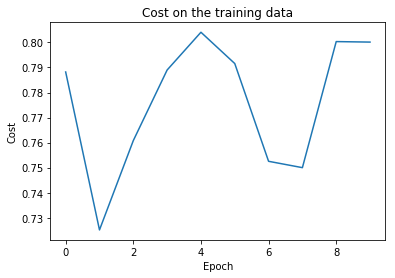

In [45]:
plt.plot(np.arange(0,EPOCH), loss)
plt.title('Cost on the training data')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

In [46]:
# Calculate TRAIN accuracy
train_res_mat = np.zeros((10, 10))
for n in range(train_num):
    x = x_train[n,:,:].reshape(-1,1)
    y = sigmoid_neuron(x,w,b)
    z = sigmoid_neuron(y,u,c)
    pred = np.argmax(z)
    true = y_train[n]
    
    train_res_mat[pred,true] = train_res_mat[pred,true] + 1

train_accuracy = np.trace(train_res_mat)/ np.sum(np.sum(train_res_mat))
print(train_accuracy)

0.29518333333333335


In [47]:
# Calculate TEST accuracy
test_res_mat = np.zeros((10, 10))
for n in range(test_num):
    x = x_test[n,:,:].reshape(-1,1)
    y = sigmoid_neuron(x,w,b)
    z = sigmoid_neuron(y,u,c)
    pred = np.argmax(z)
    true = y_test[n]
    
    test_res_mat[pred,true] = test_res_mat[pred,true] + 1

test_accuracy = np.trace(test_res_mat)/ np.sum(np.sum(test_res_mat))
print(test_accuracy)

0.2966
